In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

In [342]:
plt.rcParams['figure.figsize'] = [10, 15]
plt.rcParams['figure.dpi'] = 100

sampling = 0.01
dataRange = 1.5
x = np.arange(-dataRange, dataRange, sampling)

In [343]:
def convC(f, g):
    res = np.zeros(len(f)+len(g)-1)
    for i in range(len(f)):
        for k in range(len(g)):
            res[i+k] += f[i]*g[k]
    return res
    #return sum([f(i)*g(t-i) for i in x])
    #return integrate.quad(lambda y: f(y)*g(t-y), -np.inf, np.inf)[0]

def corellC(f, g):
    res = np.zeros(len(f)+len(g)-1)
    for i in range(len(f)):
        for k in range(len(g)):
            res[i+k] += f[i]*g[len(g)-k-1]
    return res
    #return sum([f(i)*g(t+i) for i in x])
    #return integrate.quad(lambda y: np.conjugate(f(y))*g(t+y), -np.inf, np.inf)[0]

In [344]:
def rect(w, x):
    return 1 if np.abs(x)<=w else 0

In [345]:
#----
#applies DFT to array and return an array
import scipy.fft as fft
def FFT(data):
    return fft.fft(data)
def iFFT(data):
    return fft.ifft(data)

#get axis to plot FT on
def getFreqAxis(x):
    samplingFreq = 1/sampling
    return np.arange(-samplingFreq/2, samplingFreq/2, samplingFreq/len(x))

In [346]:
def flipAtOrigin(data):
    tmp = np.array_split(data, 2)
    return np.concatenate([tmp[1], tmp[0]])

In [347]:
#plots fft of incoming data in frequency space
def plotFFT(x, ft, color = 'red'):
    #rearrange fourier transform data before drawing it
    fs = flipAtOrigin(ft)
 
    plt.plot(getFreqAxis(x), np.abs(fs), color = color)   

In [348]:
#function as array of values
def convF(f, g):
    data1 = np.zeros(len(f)+len(g)-1)
    data2 = np.zeros(len(f)+len(g)-1)
    data1[:len(f)] = f
    data2[:len(g)] = g
    data1f = np.fft.fft(data1)
    data2f = np.fft.fft(data2)

    res = np.real(np.fft.ifft(data1f*data2f))
    return res

def corellF(f, g):
    data1 = np.zeros(len(f)+len(g)-1)
    data2 = np.zeros(len(f)+len(g)-1)
    data1[:len(f)] = f
    data2[len(f) - 1:] = g
    data1f = np.fft.fft(data1)
    data2f = np.fft.fft(data2)

    res = np.real(np.fft.ifft(data1f*np.conj(data2f)))
    return res

In [349]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: np.exp(-2*t)*(t>0)

In [350]:
def test(f1, f2):
    fig, axs = plt.subplots(9)
    s = 8
    #conv and cross-correl with FT
    x2 = np.arange(len(f1) + len(f2) - 1) 
    pid = 0
    axs[pid].plot(x2, convF(f2, f1), color = 'red', label='fast convolution')
    #axs[0].scatter(x2, corellF(np.vectorize(f2)(x2), np.vectorize(f1)(x2)), color = 'blue', label='Fast cross-correl', s = s)
    axs[pid].legend()
    axs[pid].grid()
    
    pid += 1

    #discrete convolution by definition
    axs[pid].plot(x2, convC(f2, f1), 
                color = 'red', label = 'custom convolution')

    axs[pid].legend()
    axs[pid].grid()
    pid += 1
    
    axs[pid].plot(x2, np.convolve(f2, f1, 'full'), label = 'np.convolve', color='green')
    axs[pid].legend()
    axs[pid].grid()
    pid += 1
    
    axs[pid].plot(x2, corellF(f2, f1), color = 'blue', label='fast correl')
    axs[pid].legend()
    axs[pid].grid()
    
    pid += 1
    
    axs[pid].plot(x2, corellC(f2, f1), 
                color = 'blue', label = 'custom correl')

    axs[pid].legend()
    axs[pid].grid()
    pid += 1
    
    axs[pid].plot(x2, np.correlate(f2, f1, 'full'), 
                color = 'green', label = 'np.correlate')

    axs[pid].legend()
    axs[pid].grid()
    pid += 1
    
    #funtion itself
    axs[pid].plot(np.arange(len(f1)), f1, color = 'red', label='f1')
    axs[pid].plot(np.arange(len(f2)), f2, color = 'blue', label='f2')
    axs[pid].legend()
    axs[pid].grid()
    pid += 1
    
    axs[pid].plot(x2, convC(f2, f1) - np.convolve(f2, f1, 'full'), label='custom - np.convolve')
    axs[pid].legend()
    axs[pid].grid()
    pid += 1
    
    axs[pid].plot(x2, corellC(f2, f1) - np.correlate(f2, f1, 'full'), label='custom - np.correlate')
    axs[pid].legend()
    axs[pid].grid()
    pid += 1

In [351]:
from functools import partial

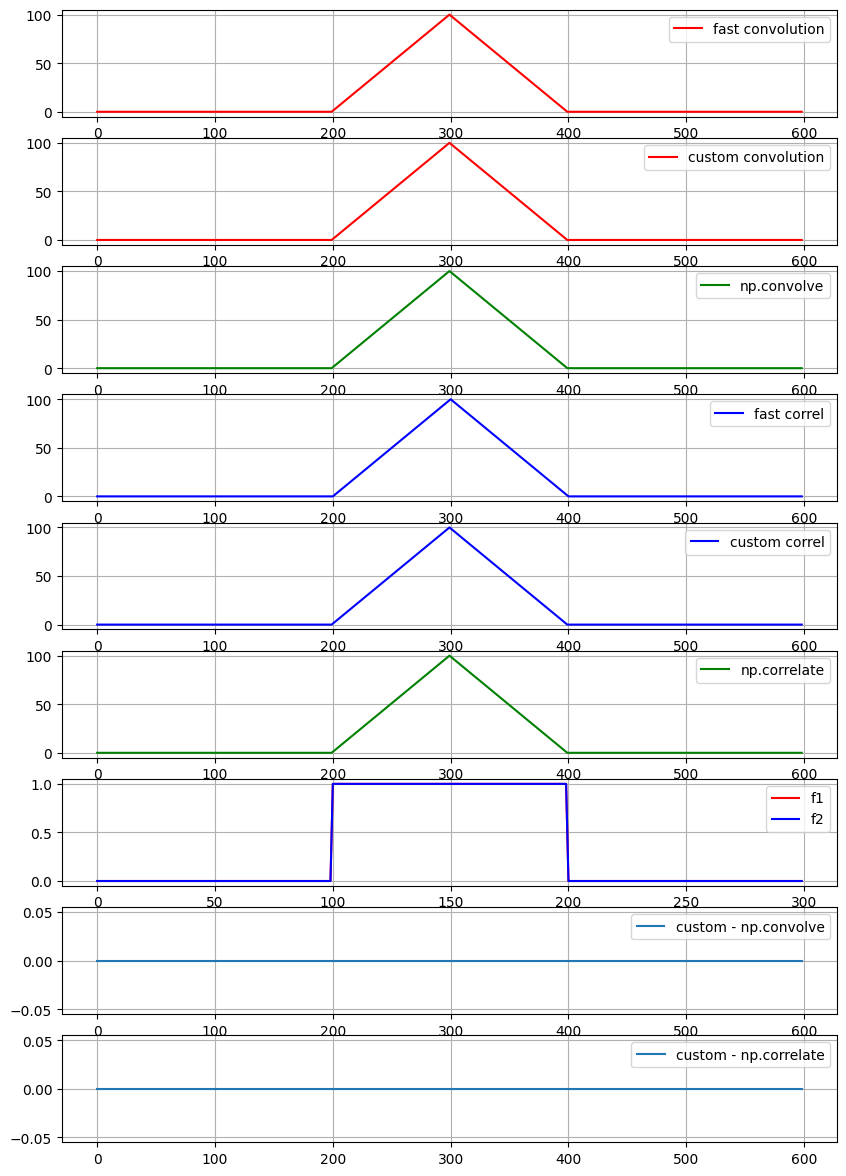

In [352]:
x = np.arange(-dataRange, dataRange, sampling)
test(np.vectorize(partial(rect, 0.5))(x), np.vectorize(partial(rect, 0.5))(x))

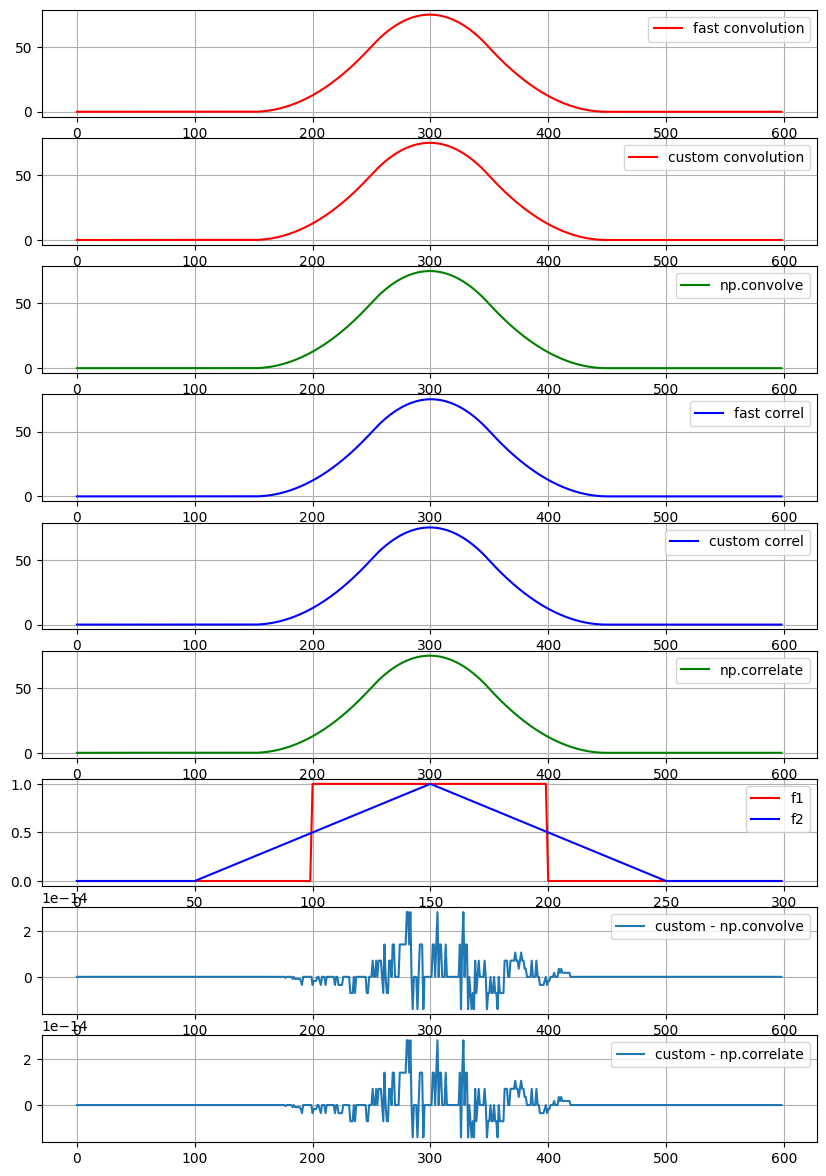

In [353]:
x = np.arange(-dataRange, dataRange, sampling)
test(np.vectorize(partial(rect, 0.5))(x), np.vectorize(f1)(x))

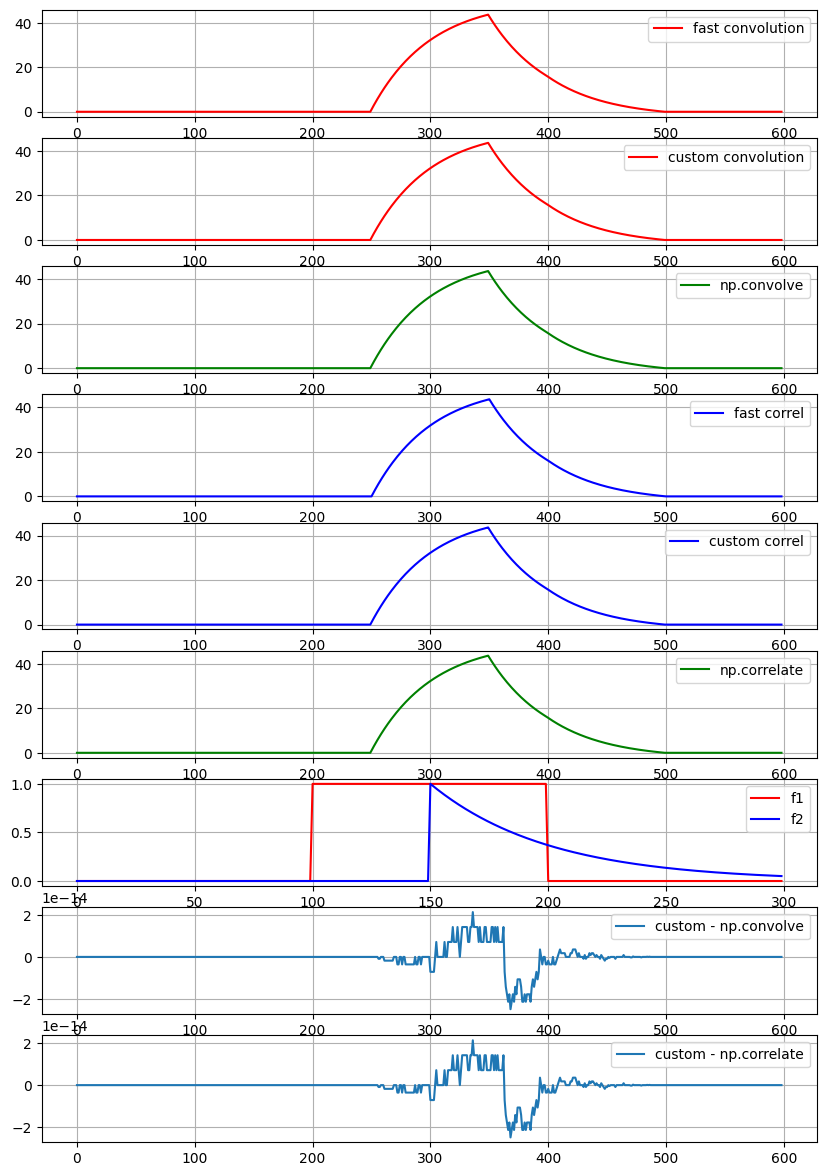

In [354]:
x = np.arange(-dataRange, dataRange, sampling)
test(np.vectorize(partial(rect, 0.5))(x), np.vectorize(f2)(x))

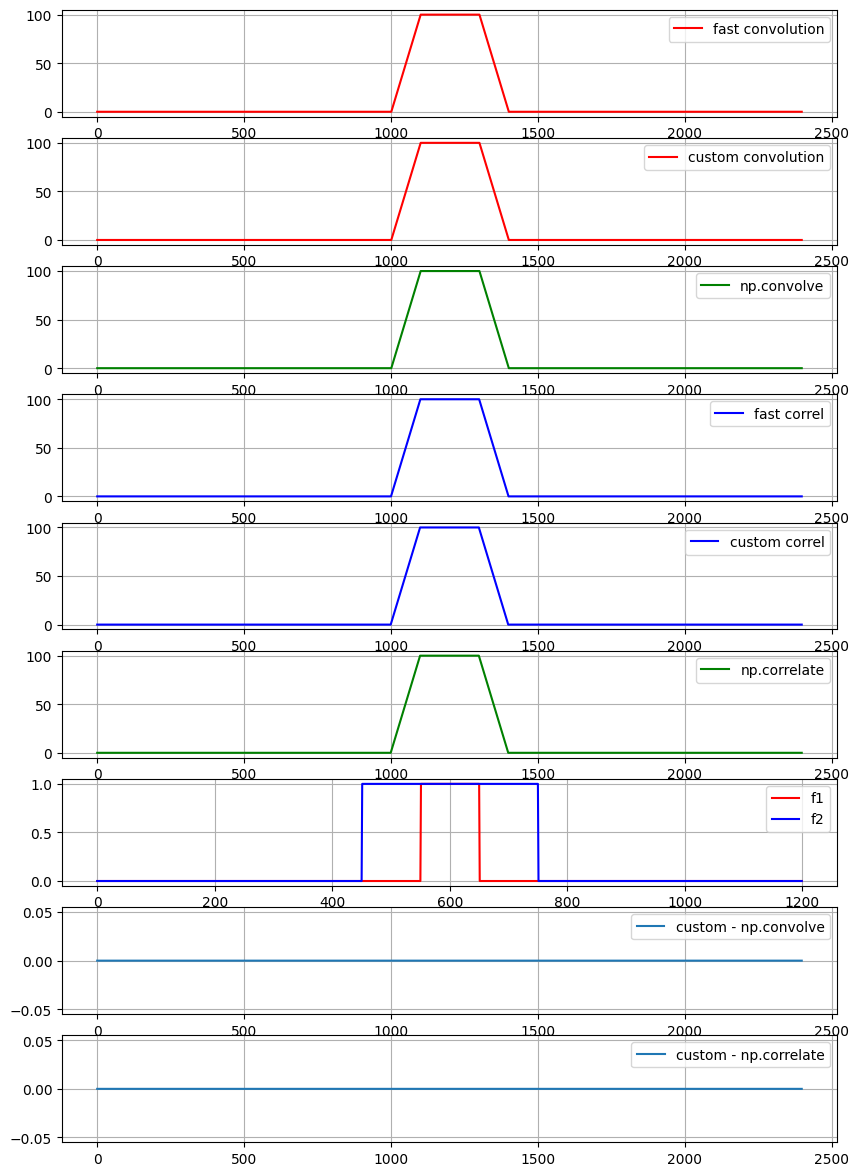

In [355]:
x = np.arange(-dataRange*4, dataRange*4, sampling)
test(np.vectorize(partial(rect, 0.5))(x), np.vectorize(partial(rect, 1.5))(x))

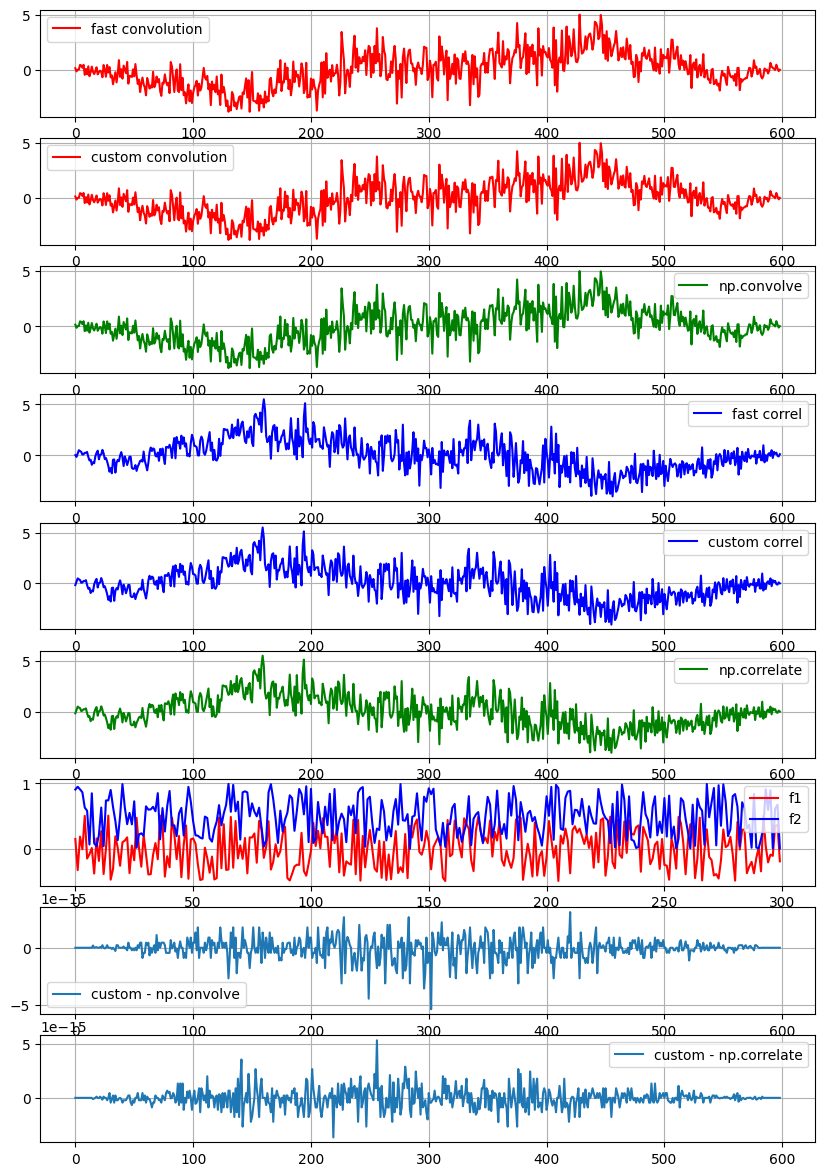

In [356]:
x = np.arange(-dataRange, dataRange, sampling)
data = np.random.random(len(x))
data -= np.mean(data)
data2 = np.random.random(len(x))

test(data, data2)

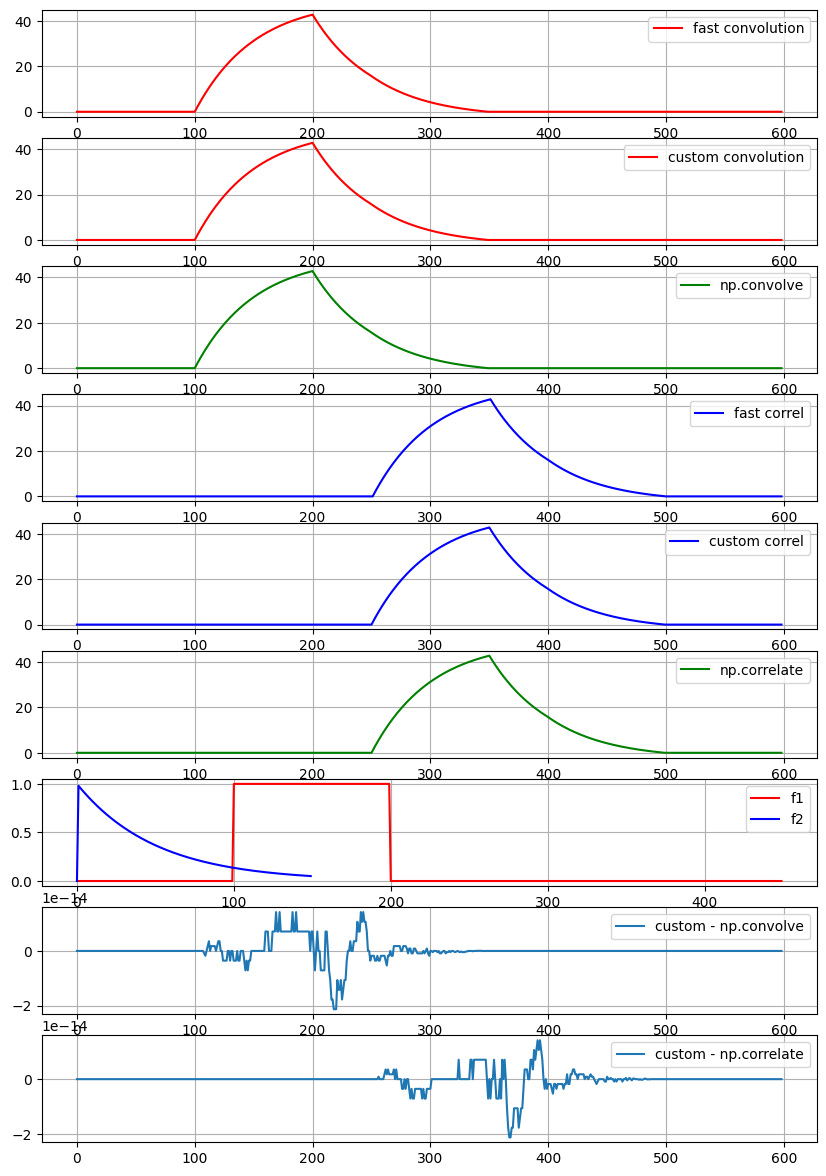

In [357]:
x = np.arange(0, dataRange, sampling)
x2 = np.arange(-dataRange, dataRange*2, sampling)

test(np.vectorize(partial(rect, 0.5))(x2), np.vectorize(f2)(x))

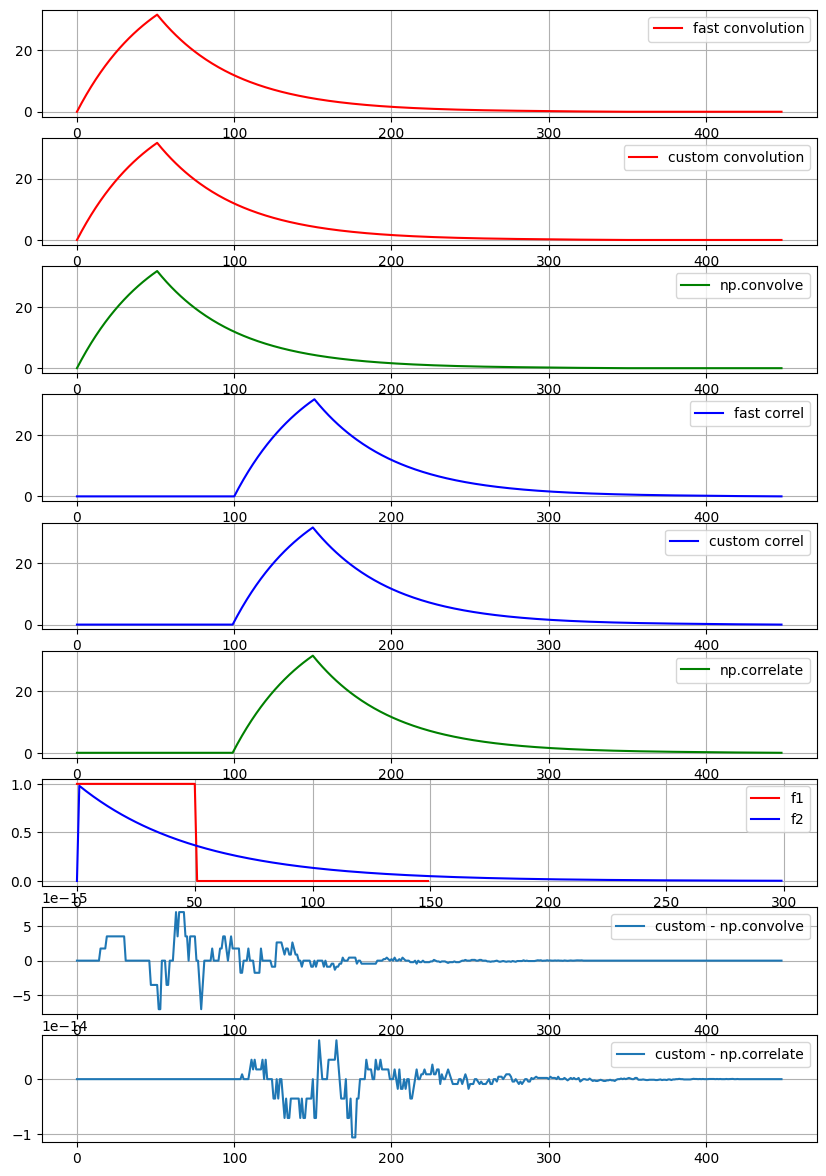

In [358]:
x = np.arange(0, dataRange, sampling)
x2 = np.arange(0, dataRange*2, sampling)

test(np.vectorize(partial(rect, 0.5))(x), np.vectorize(f2)(x2))

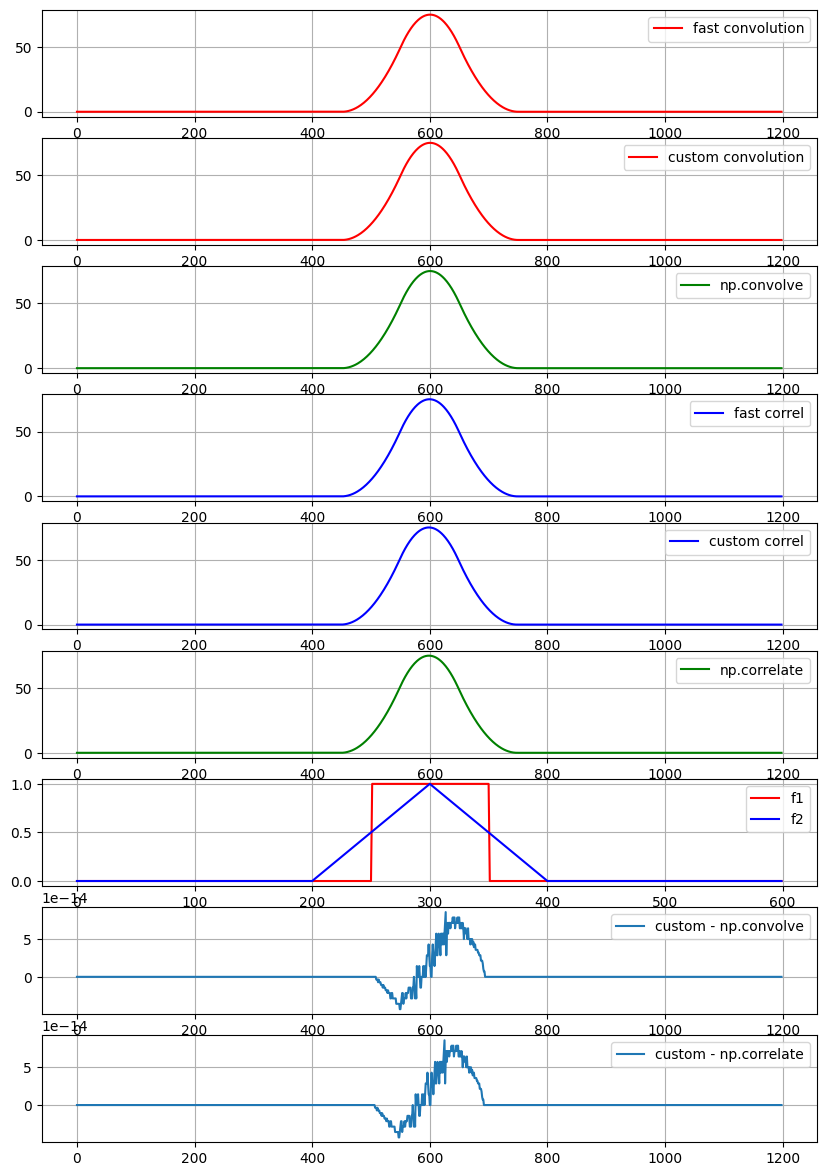

In [367]:
x = np.arange(-dataRange*2, dataRange*2, sampling)
def tria(x):
    return 1-np.abs(x) if np.abs(x)<=1 else 0.0
test(np.vectorize(partial(rect, 0.5))(x), np.vectorize(tria)(x))